In [1]:
import matplotlib.pyplot as plt
import numpy as np


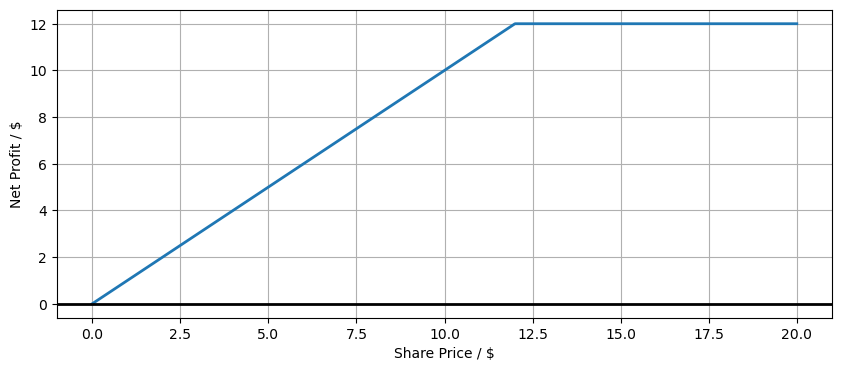

In [6]:


class Option:
    def net_profit(self, share):
        ...

    def payoff(self, share):
        ...



class Share(Option):
    def __init__(self, entry):
        self.entry = entry

    def net_profit(self, share):
        return share - self.entry
    
    def payoff(self, share):
        return share
    

class Bond(Option):
    def __init__(self, facevalue, value):
        self.facevalue = facevalue
        self.value = value

    def net_profit(self):
        return self.facevalue - self.value
    
    def payoff(self, share):
        return self.facevalue



class Call(Option):
    def __init__(self, strike, premium):
        self.strike = strike
        self.premium = premium

    def net_profit(self, share):
        return self.payoff(share) - self.premium
    
    def payoff(self, share):
        return max(0, share - self.strike)
    

class Put(Option):
    def __init__(self, strike, premium):
        self.strike = strike
        self.premium = premium

    def net_profit(self, share):
        return self.payoff(share) - self.premium
    
    def payoff(self, share):
        return max(0, self.strike - share)
    

class Short(Option):
    def __init__(self, option) -> None:
        self.option = option


    def net_profit(self, share):
        return -self.option.net_profit(share)

    def payoff(self, share):
        return -self.option.payoff(share)


Portfolio = list[Option]

def graph_portfolio(port: Portfolio):

    xs = np.linspace(0, 20, 1000)

    ys = []
    for x in xs:
        # output = []
        payoff = sum([option.payoff(x) for option in port])
        net_profit = sum([option.net_profit(x) for option in port])
        ys.append([payoff])


    fig = plt.figure(figsize=(10, 4))
    ax = plt.gca()

    ax.grid()
    ax.plot(xs, ys, linewidth=2)
    ax.axhline(0, linewidth=2, color='black')
    ax.set_xlabel('Share Price / $')
    ax.set_ylabel('Net Profit / $')

    
graph_portfolio([
    Short(Call(12, 0)),
    Share(12)
])





In [38]:
def test(guess, all_info):
	# dictionary -> keep track of the counts of characters in different colors 
    char_counts = {char: {'green': 0, 'yellow': 0, 'grey': 0} for char in \
                   "0123456789+-*%="}  # initialise possible characters
    grey_count = 0

    # iterate the list of all info 

    for info in all_info: 
        for _, char, color in info:
            char_counts[char][color] += 1
            if color == 'grey':
                grey_count += 1

    '''for each position,  retrieves info from all_info 
    and checks if the color and character match with the guess.'''
    # checking position of character
    for position, char in enumerate(guess):
        for info in all_info:
            info_position, info_char, color = info[position]
            if color == 'green' and char != info_char:
                return False # if character does not match info char
            if color in ['yellow', 'grey'] and char == info_char:
                return False # if character does not match info char

    # checking overall character
    for char, counts in char_counts.items():
        green_count = counts['green']
        yellow_count = counts['yellow']
        grey_count_in_info = counts['grey']
        min_allowed_count = green_count + yellow_count

        actual_count = guess.count(char)
        if actual_count < min_allowed_count:
            print(char)
            print(actual_count)
            print(min_allowed_count)
            return False
        if grey_count_in_info > 0 and min_allowed_count != actual_count:
            return False
       

    return True


all_info = [[(0, '1', 'yellow'), (1, '3', 'yellow'), (2, '+', 'green'), (3, '1', 'grey'), 
(4, '2', 'yellow'), (5, '-', 'grey'), (6, '8', 'grey'), (7, '=', 'green'), 
(8, '1', 'grey'), (9, '7', 'yellow')], [(0, '7', 'grey'), (1, '2', 'yellow'), 
(2, '+', 'green'), (3, '3', 'grey'), (4, '1', 'yellow'), (5, '%', 'grey'), 
(6, '6', 'grey'), (7, '=', 'green'), (8, '7', 'green'), (9, '3', 'green')], 
[(0, '2', 'green'), (1, '1', 'yellow'), (2, '+', 'green'), (3, '2', 'yellow'), 
(4, '0', 'grey'), (5, '*', 'yellow'), (6, '4', 'yellow'), (7, '=', 'green'), 
(8, '5', 'yellow'), (9, '5', 'grey')]]
test("25+4*12=73", all_info)

1
1
3


False

In [23]:
import functools

Moves = list[tuple[int, int]]
# [(start, end), (start, end), ...]

PILLARS = {1, 2, 3}

def hanoi(disks):
    return recurse_hanoi(disks, 1, 3)



@functools.lru_cache(maxsize=None)
def recurse_hanoi(disks: int, start: int, end: int) -> Moves:
    # base case
    if disks == 0:
        return []
    
    if disks == 1:
        return [(start, end)]
    
    # induction case
    # first move disk-1 from start to middle (middle=set-{start, end})
    # then move 1 disk from start to end
    # then move disk-1 from middle to end

    middle = list(PILLARS - {start, end})[0]

    moves = []

    # 1
    moves.extend(recurse_hanoi(disks - 1, start, middle))
    moves.extend(recurse_hanoi(1, start, end))
    moves.extend(recurse_hanoi(disks - 1, middle, end))

    return moves

def display_state(state):
    print("1)", ",".join(map(str, state[0])))
    print("2)", ",".join(map(str, state[1])))
    print("3)", ",".join(map(str, state[2])))

def execute_moves(disks, moves):
    state = [list(reversed(range(1, disks+1))), [], []]

    for move in moves:
        display_state(state)

        start, end = move
        print(f'move {start} to {end}')
        print()

        disk = state[start-1][-1]
        state[end-1].append(disk)
        state[start-1].pop()

    display_state(state)
    print('solved!')

diff = 1
print(len(hanoi(diff)))
# execute_moves(diff, hanoi(diff))
# 1 3 7 15 31


1
